In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# Loading Data
data = pd.read_csv('../input/clustering/musteriler.csv')
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


# Data Exploration

In [3]:
data = data.set_index('No')
data.head()

,Cinsiyet,Yas,Hacim,Maas
No,,,,
1,K,60,69900,6325
2,K,30,79000,5200
3,E,52,85500,7825
4,E,57,17100,8375
5,E,55,5500,5450


In [4]:
# Structure of data
data.shape

(200, 4)

In [5]:
# Data Statistics
data.describe()

,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000
mean,46.155000,53620.500000,5954.375000
std,17.492309,34855.146477,1777.210276
min,19.000000,0.000000,2600.000000
25%,30.000000,26575.000000,4550.000000
50%,47.000000,46400.000000,5775.000000
75%,63.000000,78225.000000,7431.250000
max,75.000000,143500.000000,10075.000000


In [6]:
# Checking for Null Values
data.isna().sum().to_frame('Null Values')

,Null Values
Cinsiyet,0
Yas,0
Hacim,0
Maas,0


In [7]:
data.corr()

,Yas,Hacim,Maas
Yas,1.000000,0.364048,0.368277
Hacim,0.364048,1.000000,0.479024
Maas,0.368277,0.479024,1.000000


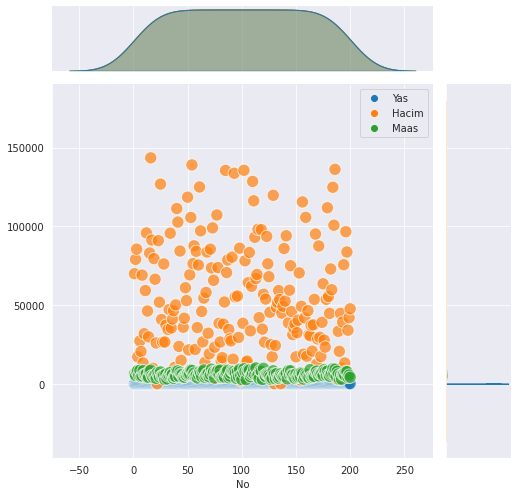

In [8]:
sns.jointplot(data=data, s=150, alpha=0.7, height=7)
plt.show()

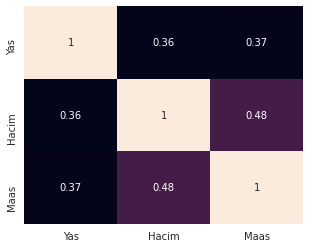

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cbar=False)
plt.show()

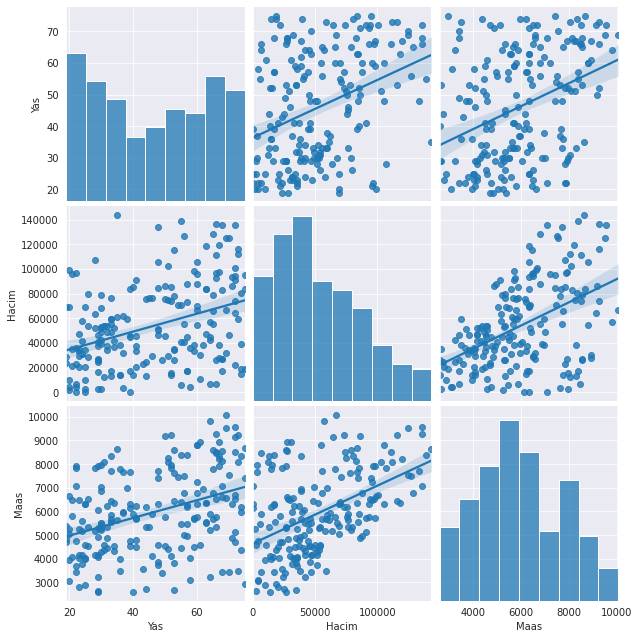

In [10]:
sns.pairplot(data, kind='reg', height=3)
plt.show()

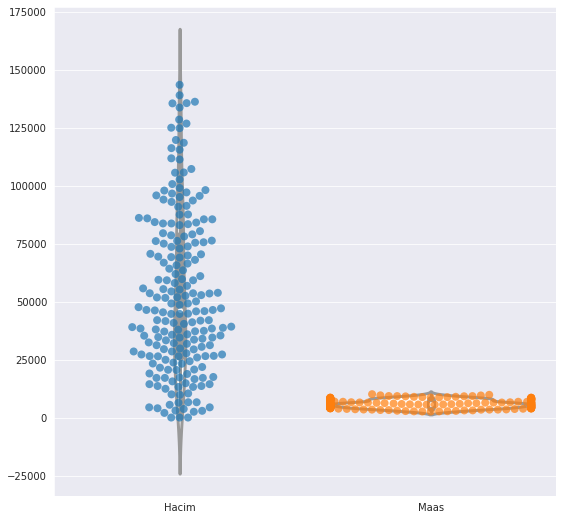

In [11]:
ndata = data.iloc[:,2:]
plt.figure(figsize=(9,9))
sns.violinplot(data=ndata, color='white', linewidth=3)
sns.swarmplot(data=ndata, s=8, alpha=0.7)
plt.show()

# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

# Preparing Data
X = ndata.values

In [13]:
wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

wcss 1: 242389902746.875
wcss 2: 69083288306.74911
wcss 3: 37364348558.3973
wcss 4: 19660743423.029774
wcss 5: 12911353632.710129
wcss 6: 8631933632.939518
wcss 7: 6681057888.771544
wcss 8: 5302915288.319813
wcss 9: 4185342947.472269
wcss 10: 3291024704.624013


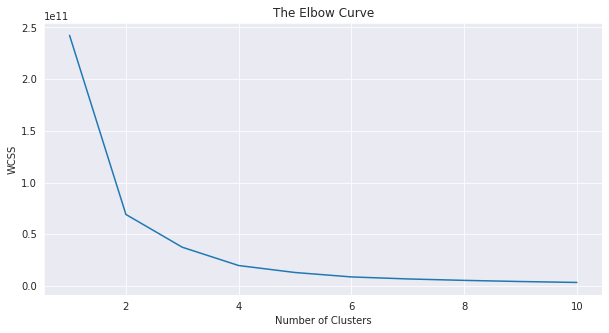

In [14]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Number of Clusters: 4

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 3, 0, 1, 0, 0, 1, 1,
       0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 3, 3, 1, 0, 1,
       1, 2, 2, 2, 2, 3, 1, 0, 3, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2, 1, 2, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 2, 2, 3, 0, 0, 2,
       1, 1, 0, 1, 3, 2, 1, 2, 1, 0, 1, 1, 2, 3, 0, 1, 1, 0, 0, 2, 2, 3,
       3, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1,
       1, 2, 3, 2, 2, 0, 2, 3, 0, 3, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2,
       2, 2], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[ 81588.46153846,   6765.38461538],
       [ 16483.33333333,   5422.91666667],
       [ 44848.52941176,   5201.47058824],
       [122140.        ,   8000.        ]])

# Visualization

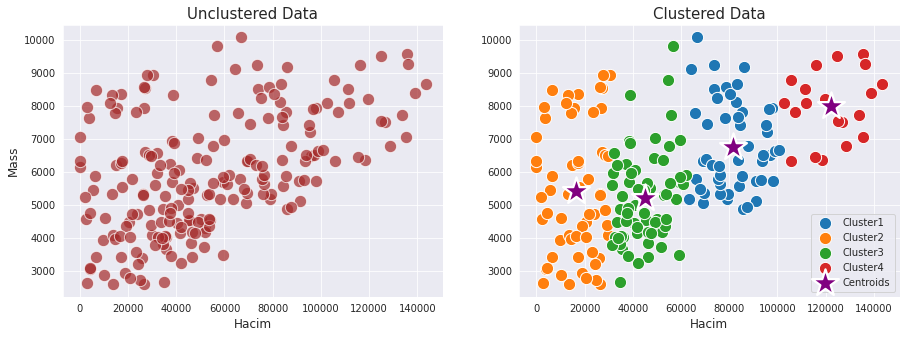

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Unclustered Data', fontsize=15)
ax[0].set_xlabel('Hacim', fontsize=12)
ax[0].set_ylabel('Mass', fontsize=12)
sns.scatterplot(data.iloc[:,2], data.iloc[:,-1], ax=ax[0], s=150, color='brown', alpha=0.7)
ax[1].set_title('Clustered Data', fontsize=15)
ax[1].set_xlabel('Hacim', fontsize=12)
for i in range(0,4):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=150, label='Cluster'+str(i+1), ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=800, marker='*', 
                color='purple', label='Centroids', ax=ax[1])
fig.show()

## Thank You!